In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
di_df = pd.read_csv('disability.csv',skiprows = 1)

In [6]:
di_df.head(20)

,Table Name,State Code,Distt.Code,Area Name,Total/Rural/Urban,Age-group,Total number of disabled persons,Unnamed: 7,Unnamed: 8,In seeing,...,Unnamed: 23,Mental Illness,Unnamed: 25,Unnamed: 26,Any Other,Unnamed: 28,Unnamed: 29,Multiple Disability,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
1,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4,...,18,19,20,21,22,23,24,25,26,27
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C4920,20.0,0.0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104","180,721",...,"15,857","20,157","11,718","8,439","112,372","62,136","50,236","58,835","31,965","26,870"
4,C4920,20.0,0.0,State-JHARKHAND,Total,0-4,"46,455","24,406","22,049","14,154",...,723,292,173,119,"10,382","5,417","4,965","2,773","1,551","1,222"
5,C4920,20.0,0.0,State-JHARKHAND,Total,5-9,"67,427","36,416","31,011","17,628",...,"1,597",984,568,416,"10,392","5,530","4,862","5,741","3,391","2,350"
6,C4920,20.0,0.0,State-JHARKHAND,Total,10-19,"144,770","79,989","64,781","32,509",...,"4,457","3,612","2,060","1,552","21,142","11,471","9,671","12,018","6,882","5,136"
7,C4920,20.0,0.0,State-JHARKHAND,Total,20-29,"111,923","63,708","48,215","23,563",...,"3,001","4,151","2,501","1,650","17,500","9,697","7,803","7,014","4,101","2,913"
8,C4920,20.0,0.0,State-JHARKHAND,Total,30-39,"95,138","55,563","39,575","21,067",...,"2,298","3,933","2,373","1,560","15,718","8,991","6,727","4,885","2,926","1,959"
9,C4920,20.0,0.0,State-JHARKHAND,Total,40-49,"83,172","49,573","33,599","18,902",...,"1,641","3,270","1,941","1,329","13,102","7,646","5,456","4,015","2,405","1,610"


In [7]:
di_df.columns

Index(['Table Name', 'State Code', 'Distt.Code', 'Area Name',
       'Total/Rural/Urban', 'Age-group', 'Total number of disabled persons',
       'Unnamed: 7', 'Unnamed: 8', 'In seeing', 'Unnamed: 10', 'Unnamed: 11',
       'In Hearing', 'Unnamed: 13', 'Unnamed: 14', 'In Speech', 'Unnamed: 16',
       'Unnamed: 17', 'In Movement', 'Unnamed: 19', 'Unnamed: 20',
       'Mental Retardation', 'Unnamed: 22', 'Unnamed: 23', 'Mental Illness',
       'Unnamed: 25', 'Unnamed: 26', 'Any Other', 'Unnamed: 28', 'Unnamed: 29',
       'Multiple Disability', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [12]:
adi_df = di_df[['Area Name','Age-group','Total/Rural/Urban']]
tot_di_df = di_df.loc[:,'Total number of disabled persons':'In seeing'].iloc[:,:-1]
mental_di_df = di_df.loc[:,'Mental Retardation':'Mental Illness'].iloc[:,:-1]
mental1_di_df = di_df.loc[:,'Mental Illness':'Any Other'].iloc[:,:-1]
mental1_di_df.head()

,Mental Illness,Unnamed: 25,Unnamed: 26
0,Persons,Males,Females
1,19,20,21
2,NaN,NaN,NaN
3,"20,157","11,718","8,439"
4,292,173,119


In [14]:
total_dis_df = pd.concat([adi_df,tot_di_df],axis = 1)
mental_ill_df = pd.concat([adi_df,mental_di_df,mental1_di_df],axis = 1)
total_dis_df.head()

,Area Name,Age-group,Total/Rural/Urban,Total number of disabled persons,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,Persons,Males,Females
1,NaN,NaN,NaN,1,2,3
2,NaN,NaN,NaN,NaN,NaN,NaN
3,State-JHARKHAND,Total,Total,"769,980","426,876","343,104"
4,State-JHARKHAND,0-4,Total,"46,455","24,406","22,049"


In [16]:
mental_ill_df.head(20)

,Area Name,Age-group,Total/Rural/Urban,Mental Retardation,Unnamed: 22,Unnamed: 23,Mental Illness,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,Persons,Males,Females,Persons,Males,Females
1,NaN,NaN,NaN,16,17,18,19,20,21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State-JHARKHAND,Total,Total,"37,458","21,601","15,857","20,157","11,718","8,439"
4,State-JHARKHAND,0-4,Total,"1,545",822,723,292,173,119
5,State-JHARKHAND,5-9,Total,"3,631","2,034","1,597",984,568,416
6,State-JHARKHAND,10-19,Total,"10,276","5,819","4,457","3,612","2,060","1,552"
7,State-JHARKHAND,20-29,Total,"7,196","4,195","3,001","4,151","2,501","1,650"
8,State-JHARKHAND,30-39,Total,"5,675","3,377","2,298","3,933","2,373","1,560"
9,State-JHARKHAND,40-49,Total,"4,235","2,594","1,641","3,270","1,941","1,329"


In [18]:
mental_ill_df.columns = ['Area Name','Age group','Total/Rural/Urban','Mental_Retardation_total','Mental_Retardation_M','Mental_Retardation_F','Mental_Illness_total','Mental_Illness_M','Mental_Illness_F']
mental_ill_df.head()

,Area Name,Age group,Total/Rural/Urban,Mental_Retardation_total,Mental_Retardation_M,Mental_Retardation_F,Mental_Illness_total,Mental_Illness_M,Mental_Illness_F
0,NaN,NaN,NaN,Persons,Males,Females,Persons,Males,Females
1,NaN,NaN,NaN,16,17,18,19,20,21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State-JHARKHAND,Total,Total,"37,458","21,601","15,857","20,157","11,718","8,439"
4,State-JHARKHAND,0-4,Total,"1,545",822,723,292,173,119


In [20]:
mental_ill_df = mental_ill_df[3:].reset_index(drop = True)

# EDA

In [23]:
mental_ill_df.head()

,Area Name,Age group,Total/Rural/Urban,Mental_Retardation_total,Mental_Retardation_M,Mental_Retardation_F,Mental_Illness_total,Mental_Illness_M,Mental_Illness_F
0,State-JHARKHAND,Total,Total,"37,458","21,601","15,857","20,157","11,718","8,439"
1,State-JHARKHAND,0-4,Total,"1,545",822,723,292,173,119
2,State-JHARKHAND,5-9,Total,"3,631","2,034","1,597",984,568,416
3,State-JHARKHAND,10-19,Total,"10,276","5,819","4,457","3,612","2,060","1,552"
4,State-JHARKHAND,20-29,Total,"7,196","4,195","3,001","4,151","2,501","1,650"


In [25]:
mental_ill_df.info

<bound method DataFrame.info of                         Area Name       Age group Total/Rural/Urban  \
0                 State-JHARKHAND           Total             Total   
1                 State-JHARKHAND             0-4             Total   
2                 State-JHARKHAND             5-9             Total   
3                 State-JHARKHAND           10-19             Total   
4                 State-JHARKHAND           20-29             Total   
..                            ...             ...               ...   
970  District-Saraikela-Kharsawan           60-69             Urban   
971  District-Saraikela-Kharsawan           70-79             Urban   
972  District-Saraikela-Kharsawan           80-89             Urban   
973  District-Saraikela-Kharsawan             90+             Urban   
974  District-Saraikela-Kharsawan  Age Not Stated             Urban   

    Mental_Retardation_total Mental_Retardation_M Mental_Retardation_F  \
0                     37,458             

In [27]:
mental_ill_df.describe

<bound method NDFrame.describe of                         Area Name       Age group Total/Rural/Urban  \
0                 State-JHARKHAND           Total             Total   
1                 State-JHARKHAND             0-4             Total   
2                 State-JHARKHAND             5-9             Total   
3                 State-JHARKHAND           10-19             Total   
4                 State-JHARKHAND           20-29             Total   
..                            ...             ...               ...   
970  District-Saraikela-Kharsawan           60-69             Urban   
971  District-Saraikela-Kharsawan           70-79             Urban   
972  District-Saraikela-Kharsawan           80-89             Urban   
973  District-Saraikela-Kharsawan             90+             Urban   
974  District-Saraikela-Kharsawan  Age Not Stated             Urban   

    Mental_Retardation_total Mental_Retardation_M Mental_Retardation_F  \
0                     37,458           

<Axes: >

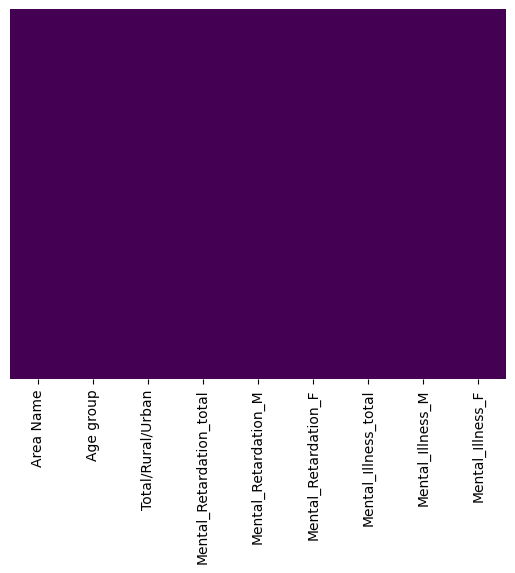

In [29]:
sns.heatmap(mental_ill_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
mental_ill_df['Area Name'].unique()

array(['State-JHARKHAND', 'District-Garhwa ', 'District-Chatra',
       'District-Kodarma', 'District-Giridih', 'District-Deoghar',
       'District-Godda', 'District-Sahibganj', 'District-Pakur',
       'District-Dhanbad', 'District-Bokaro', 'District-Lohardaga',
       'District-Purbi Singhbhum', 'District-Palamu', 'District-Latehar',
       'District-Hazaribagh', 'District-Ramgarh', 'District-Dumka',
       'District-Jamtara', 'District-Ranchi', 'District-Khunti',
       'District-Gumla', 'District-Simdega',
       'District-Pashchimi Singhbhum', 'District-Saraikela-Kharsawan'],
      dtype=object)

In [33]:
mental_ill_df['Age group'].unique()

array(['Total', '0-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90+', 'Age Not Stated'], dtype=object)

In [35]:
districts = list(mental_ill_df['Area Name'].unique())
print(districts)

['State-JHARKHAND', 'District-Garhwa ', 'District-Chatra', 'District-Kodarma', 'District-Giridih', 'District-Deoghar', 'District-Godda', 'District-Sahibganj', 'District-Pakur', 'District-Dhanbad', 'District-Bokaro', 'District-Lohardaga', 'District-Purbi Singhbhum', 'District-Palamu', 'District-Latehar', 'District-Hazaribagh', 'District-Ramgarh', 'District-Dumka', 'District-Jamtara', 'District-Ranchi', 'District-Khunti', 'District-Gumla', 'District-Simdega', 'District-Pashchimi Singhbhum', 'District-Saraikela-Kharsawan']


In [42]:
age_groups = list(mental_ill_df['Age group'].unique())
print(age_groups)

['Total', '0-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+', 'Age Not Stated']


In [44]:
mental_retardness_total = mental_ill_df[(mental_ill_df['Age group'] == 'Total')&(mental_ill_df['Total/Rural/Urban']=='Total')].reset_index()
mental_retardness_total = mental_retard_ness_total.sort_values(by='Mental_Retardation_total',ascending = False)

NameError: name 'mental_retard_ness_total' is not defined

In [ ]:
sns.barplot(x = 'Area Name', y = 'Mental_Retardation_total',data = mental_retardness_total)
plt.xticks(rotation=90)
plt.ylabel('number of mentally retarded people (of all age groups)')
plt.tight_layout()
plt.figure(figsize=(10,18))
plt.show()

# loading population dataset and comparing

In [ ]:
o_df = pd.read_csv('population.csv',skiprows=1)